# Modeling for the Data set #
Prepared by: Danny Hinojosa

Dated: July 3, 2022

## Table of Content ##


[Introduction](#Introduction)

[Brief Review of the Data](#Brief-Review-of-the-Data)

[Training and Test Setup](#Training-and-Test-Setup)

[Setup Natural Language Processing](#Setup-Natural-Language-Processing)
    
[Scaling and Transformation](#Scaling-and-Transformation)

[Machine Learning Models](#Machine-Learning-Models)

- [Linear Regression - 1](#Linear-Regression---1)
- [Linear Regression - 2](#Linear-Regression---2)
- [Linear Regression - 3](#Linear-Regression---3)
- [Linear Regression - 4](#Linear-Regression---4)
- [Linear Regression - 5](#Linear-Regression---5)
- [Linear Regression - 6](#Linear-Regression---6)
- [Linear Regression - 7](#Linear-Regression---7)
- [XG Boost Model](#XG-Boost-Model)
- [KNN Regression](#KNN-Regression)
- [Decision Tree Regression](#Decision-Tree-Regression)
- [Epsilon-Support Vector Regression](#Epsilon-Support-Vector-Regression)
- [Polynomial Ridge Regression](#Polynomial-Ridge-Regression)
- [Neural Network 1](#Neural-Network-1)

[Review Model Scores](#Review-Model-Scores)

[Best Model and Interpretation](#Best-Model-and-Interpretation)

## Introduction ##

The purpose of this notebook is to explore various machine learning models and evaluate what fits the data best. The models will predict Anime Revenue based on the various properties and Natural Language Processing on synopsis. 

The data was prepared in the *Capstone- EDA* Notebook. 

The following will be examined:

1) Natural Language Processing

2) Linear Regression Models

3) XG Boost Regression Models

4) KNN Regression Models

5) Decision Tree Regression Models

6) Epsilon-Support Vector Regression

7) Polynomial Ridge Regression

8) Neural Networks 

The models will also use pipeline and gridsearch to optimize hyperparameter. 

Of these models, *R Squared* Metrics will be used to determine the best model.  

### Import required libraries and data ##

The machine learning python libraries and supplemental libraries will be imported into the notebook. 

The prepared data is labeled as *final_df.csv*. 

In [2]:
#Main DS libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Visualication
import seaborn as sns


# Additional python libraries
import re
import string


#Machine Learning libraries for Setup
from sklearn.model_selection import train_test_split
import ast 

#NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords 

#Scaling and transformation libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

#Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Machine Learning pipeline
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Neural Network 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import XGboost
from xgboost import XGBRegressor

C:\Users\danny\anaconda3\envs\capstone_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Please note various package are required for the code above. Common package that may need to be installed are:
- Keras / TensorFolow
- Sklearns
- XGboost
- TfidfVectorizer
- Sklearn 



In [4]:
# import Data
final_df = pd.read_csv('data_for_model/final_df.csv')

## Brief Review of the Data ##

As the data was passed on from another notebook, the data will be brief review to vary correct features are present, no missing data is present, and data type are correctly noted.

In [5]:
shape =final_df.shape

print(f'The data contains {shape[0]} rows and {shape[1]} features or columns')

The data contains 2404 rows and 196 features or columns


In [6]:
# Check first 15 features 
display(final_df.iloc[:,0:15].head())

# Check last 15 features 
display(final_df.iloc[:,-15:].head())

,Unnamed: 0,title,episodes,2_synopsis,episodes_log,duration_min,duration_min_log,aired_start_month,aired_start_year,aired_end_month,revenue_log,"('type_Movie',)","('type_Other',)","('type_TV',)","('source_Game',)"
0,0,witch hunter robin,26.0,Witches are individuals with special powers li...,3.295837,25.0,3.258097,7.0,2002.0,12.0,13.986646,0,0,1,0
1,1,hachimitsu to clover,24.0,"Yuuta Takemoto, a sophomore at an arts college...",3.218876,23.0,3.178054,4.0,2005.0,9.0,15.048370,0,0,1,0
2,2,initial d fourth stage,24.0,Takumi Fujiwara finally joins Ryousuke and Kei...,3.218876,27.0,3.332205,4.0,2004.0,2.0,16.435096,0,0,1,0
3,3,ring ni kakero 1,12.0,"In order to fulfill their dead father's wish, ...",2.564949,25.0,3.258097,10.0,2004.0,12.0,12.444601,0,0,1,0
4,4,school rumble,26.0,"Just the words ""I love you,"" and everything ch...",3.295837,23.0,3.178054,10.0,2004.0,3.0,14.909663,0,0,1,0


,publisher_vap,publisher_warnerbrothers,distributor_avex,distributor_bandai visual,distributor_happinet,distributor_kadokawa,distributor_king records,distributor_media factory,distributor_nbc universal (geneon),distributor_pony canyon,distributor_sony,distributor_touhou,distributor_vap,distributor_victor entertainment,distributor_warner brothers
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
#Check missing data

print(f'The total number of missing data is {final_df.isna().sum().sum()}.')

The total number of missing data is 0.


In [8]:
# Check first 15 features data type 
display(final_df.iloc[:,0:15].info())

# Check last 15 features feature data type
display(final_df.iloc[:,-15:].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2404 non-null   int64  
 1   title              2404 non-null   object 
 2   episodes           2404 non-null   float64
 3   2_synopsis         2404 non-null   object 
 4   episodes_log       2404 non-null   float64
 5   duration_min       2404 non-null   float64
 6   duration_min_log   2404 non-null   float64
 7   aired_start_month  2404 non-null   float64
 8   aired_start_year   2404 non-null   float64
 9   aired_end_month    2404 non-null   float64
 10  revenue_log        2404 non-null   float64
 11  ('type_Movie',)    2404 non-null   int64  
 12  ('type_Other',)    2404 non-null   int64  
 13  ('type_TV',)       2404 non-null   int64  
 14  ('source_Game',)   2404 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 281.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   publisher_vap                       2404 non-null   int64
 1   publisher_warnerbrothers            2404 non-null   int64
 2   distributor_avex                    2404 non-null   int64
 3   distributor_bandai visual           2404 non-null   int64
 4   distributor_happinet                2404 non-null   int64
 5   distributor_kadokawa                2404 non-null   int64
 6   distributor_king records            2404 non-null   int64
 7   distributor_media factory           2404 non-null   int64
 8   distributor_nbc universal (geneon)  2404 non-null   int64
 9   distributor_pony canyon             2404 non-null   int64
 10  distributor_sony                    2404 non-null   int64
 11  distributor_touhou                  2404 non-null   int64
 12  distri

None

**Take aways:**
- There is no missing data
- There are 197 features 
- 'Unnamed:0' is not needed and can be dropped
- All features except title and 2_synopsis are correctly numeric
- `Title` will be removed at train and test set up

In [9]:
#Drop unnamed: 0 
final_df.drop(columns='Unnamed: 0', inplace=True)

## Training and Test Setup ##

The data will be split into train and test where shape of test set will be 20% of the total. 

There are a couple of features that reflect transformation of another feature. Per the EDA, the transformed features appeared to resemble a bell curve best and will be used for the modeling. 

A second train-test set with untransformed data will be used on one model to show that transformed features are best. 

In [10]:
# Create X and Y variable
    #All object, episode, and duration_min are droped

y = final_df['revenue_log'].copy()
X = final_df.drop(columns = ['title','revenue_log','episodes','duration_min']).copy()

#Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [11]:
# Create X and Y variable With untransf features
    #All object, episode_log, and duration_min_log are droped

y_untransf = final_df['revenue_log'].copy()
X_untransf = final_df.drop(columns = ['title','revenue_log','episodes_log','duration_min_log']).copy()

#Train and test split
X_train_untransf,X_test_untransf,y_train_untransf,y_test_untransf = train_test_split(X_untransf,y_untransf,test_size=0.2, random_state=42)

In [12]:
#check shape
train_shape=X_train.shape
shape=final_df.shape
print(f'The total number rows for the train set is {train_shape[0]} where originial data contained {shape[0]}.\
      \nThe total number of features for the train set is {train_shape[1]} where originial data contained {shape[1]}.')

The total number rows for the train set is 1923 where originial data contained 2404.      
The total number of features for the train set is 191 where originial data contained 195.


## Setup Natural Language Processing ##

The Natural language processing will created using the Tfidfvectorizer package and token will be follow a custom tokenizer function using ntlk package. 

The process will be created and fitted to *X_train* and `2_synopsis` feature.

To limit potential issues of having too many features, the number of token will be limited to 1500. 

In [13]:

#Instantiate PorterStemmer
stemmer = nltk.stem.PorterStemmer()

#Load stopwords
nltk.download('stopwords')

#Create stop words for english 
ENGLISH_STOP_WORDS = stopwords.words('english')

#Create tonkenizer function
def my_tokenizer(sentence):
    
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Instantiate TfidVectorizer 

tfidf = TfidfVectorizer(min_df=10,max_features=1500,
                        tokenizer=my_tokenizer)

#Fit TfidVectorizer
tfidf.fit(X_train['2_synopsis'])

#Transform TfidVectorizer for train and test
X_train_transformed = tfidf.transform(X_train['2_synopsis'])
X_test_transformed = tfidf.transform(X_test['2_synopsis'])

#Check Shape
print(f'The total number of rows for train set is {X_train_transformed.shape[0]}.\
    \nThe total number of columns for train set is {X_train_transformed.shape[1]}.')

C:\Users\danny\anaconda3\envs\capstone_env\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


The total number of rows for train set is 1923.    
The total number of columns for train set is 1500.


The top 20 words will be plotted with respective counts. 

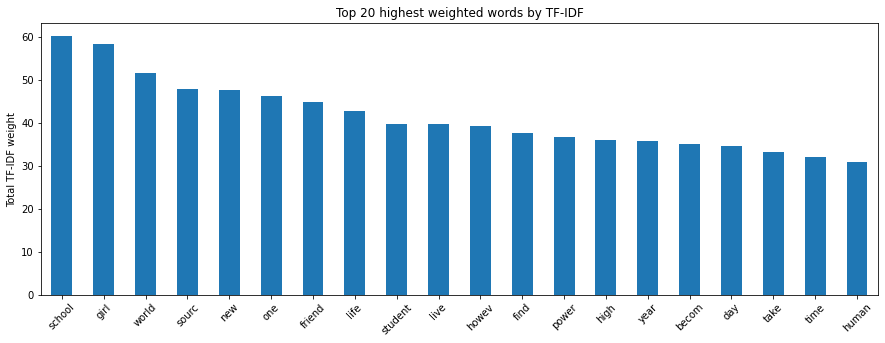

In [16]:
#Plot the top 20 
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)


word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

Per the synopsis, the most common words are: school, girl, world, new, source, one, friend, life, live, however, and student. 

Some insight of common plots are as follows:

- *School*, and *student* suggest common plots occur at schools and characters are likely adolescents  
- *Girl* suggest either main cast of characters tend to be girls or plot includes a love interest 
- Use of *World* and *human* suggest there are other world or species as use of these words are unusual regarding a synopsis. This suggest plot tend to include a different world or include fantasy creatures. 

While this does not directly address the prediction of revenue, the anime stories are most likely to refer to these words and these words could have an impact on the predictive model.

### The token data is added back to the train set

In [17]:
#Revise Train and test set

#train
dense_array_1= X_train_transformed.toarray()

encoded_df1 = pd.DataFrame(dense_array_1, columns=tfidf.get_feature_names(), dtype=float)
encoded_df1= encoded_df1.add_prefix('summary_')
X_train.reset_index(inplace =True)
X_train_transformed_= pd.concat([X_train,encoded_df1], axis =1 )
X_train_transformed_.drop(columns = '2_synopsis', inplace = True)
X_train_transformed_.set_index(X_train_transformed_.columns[0], inplace = True)

#Revise Train and test set

#test
dense_array_2= X_test_transformed.toarray()

encoded_df2 = pd.DataFrame(dense_array_2, columns=tfidf.get_feature_names(), dtype=float)
encoded_df2= encoded_df2.add_prefix('summary_')
X_test.reset_index(inplace =True)
X_test_transformed_= pd.concat([X_test,encoded_df2], axis =1 )
X_test_transformed_.drop(columns = '2_synopsis', inplace = True)
X_test_transformed_.set_index(X_test_transformed_.columns[0], inplace = True)

Synopsis has been processed through TF-IDF Vectorization and added to the train and test data sets. 

## Scaling and Transformation ## 

Next, exploration will be required to determine the best scale and transformation to use. 

For this project, standard scaler, and MinMax scaler will be considered for scaling. Additional option for transformation is PCA. This can be created over scaler data or unscaled data. 

For the first couple of modeling, these transformation will be explored on to a basic linear regression model 

In [18]:
# 1. Instantiate a standard scaler
my_standard_scaler = MinMaxScaler()

# 2. fit the scaler
my_standard_scaler.fit(X_train_transformed_)

# 3. transform the data
X_train_transformed_standard_scale = my_standard_scaler.transform(X_train_transformed_)

X_test_transformed_standard_scale = my_standard_scaler.transform(X_test_transformed_)

In [19]:
#1. Instantiate Minmax Scalar
my_minmax_scaler = MinMaxScaler()

# 2. fit the scaler
my_minmax_scaler.fit(X_train_transformed_)

# 3. transform the data

X_train_transformed_minmax = my_minmax_scaler.transform(X_train_transformed_)

X_test_transformed_minmax = my_minmax_scaler.transform(X_test_transformed_)

Principle Component Analysis (PCA) will be created on unscaled data for testing. Following industry standard, the n_component for PCA will be set to 0.9. 

In [20]:
from sklearn.decomposition import PCA

my_PCA = PCA(n_components=0.9)

my_PCA.fit(X_train_transformed_)

X_train_pca_transformation = my_PCA.transform(X_train_transformed_)

X_test_pca_transformation = my_PCA.transform(X_test_transformed_)


## Machine Learning Models  ##

### Linear Regression - 1 ##

The Linear Regression model will be created using unscaled train data without further transformation.

In [21]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train_transformed_, y_train)

model_prediction_train = linear_regression_model.predict(X_train_transformed_)
model_prediction = linear_regression_model.predict(X_test_transformed_)


# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction)}')



The train R2 score: 0.9384220205275614
The test R2 score: -3.5504186911956204


In [22]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction)**.5}')

The train RMSE score: 0.47828018963111113
The test RMSE score: 4.11904506843252


Per the R squared score results, the linear regression model for untransformed data fits the train data well but, the test data is not interpretable. 

### Linear Regression - 2 ##

The Linear Regression model will be created using standard scaled train data without further transformation.

In [23]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train_transformed_standard_scale, y_train)

model_prediction_train = linear_regression_model.predict(X_train_transformed_standard_scale)
model_prediction = linear_regression_model.predict(X_test_transformed_standard_scale)


# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction)}')



The train R2 score: 0.9340098239165381
The test R2 score: -3.5685408183154994


In [24]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction)**.5}')

The train RMSE score: 0.49511868828178635
The test RMSE score: 4.127239005232144


Per the R squared score results, the linear regression model for scaled data fits the train data well but, the test data is not interpretable. 

### Linear Regression - 3 ##

The Linear Regression model will be created using min-max scaled train data without further transformation.

In [25]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train_transformed_minmax, y_train)

model_prediction_train = linear_regression_model.predict(X_train_transformed_minmax)
model_prediction = linear_regression_model.predict(X_test_transformed_minmax)

# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction)}')


The train R2 score: 0.9340098239165381
The test R2 score: -3.5685408183154994


In [26]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction)**.5}')

The train RMSE score: 0.49511868828178635
The test RMSE score: 4.127239005232144


Per the R squared score results, the linear regression model for scaled data fits the train data well but, the test data is not interpretable. 

### Linear Regression - 4 ##

The Linear Regression model will be created using unscaled train data with PCA transformation. 

In [27]:
# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model
linear_regression_model.fit(X_train_pca_transformation, y_train)

model_prediction_train = linear_regression_model.predict(X_train_pca_transformation)
model_prediction = linear_regression_model.predict(X_test_pca_transformation)


# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction)}')


The train R2 score: 0.36678672048114647
The test R2 score: 0.341801151492896


In [28]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction)**.5}')

The train RMSE score: 1.533715061844456
The test RMSE score: 1.5665686223919713


Per the R squared score results, the linear regression model for transformed data did not fit the train data well,. The test data fit better than the previous three model.

### Linear Regression - 5 ##

The Linear Regression model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best normalizing scaler (standard or min max) and the best number of components for PCA. The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

After the best hyperparameters are determined, the a new linear model will be created and fitted with the optimal parameters.

#### Grid Search for Linear Regression ####

In [29]:
cachedir = mkdtemp()

#Esimtator 
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', LinearRegression())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [LinearRegression()],
          'normalise': [StandardScaler(),MinMaxScaler()],
          'reduce_dim__n_components': [0.75,0.8,0.85,0.9,0.95]}
]

#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)

#Fit Grid Search to train data   
fitted_search = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   2.0s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   2.0s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=LinearRegression(), normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=LinearRegression(), nor

In [30]:
print(f'Fitted score for optimal hyperparameter is {fitted_search.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.46128.


In [31]:
print('Best hyperparameter is:')
display(fitted_search.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpb_kq7xb4',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.75)),
                ('model', LinearRegression())])

#### Apply best hyperparameter to model ####

In [32]:
#Instiate, Fit and Transform minmax data for PCA where n_component =0.75 
my_PCA = PCA(n_components=0.75)
my_PCA.fit(X_train_transformed_minmax)
X_train_LR5_transformation = my_PCA.transform(X_train_transformed_minmax)
X_test_LR5_transformation = my_PCA.transform(X_test_transformed_minmax)


In [33]:
# 1. Instantiate the model
linear_regression_model_5 = LinearRegression()

# 2. Fit the model
linear_regression_model_5.fit(X_train_LR5_transformation, y_train)

model_prediction_LR5 = linear_regression_model_5.predict(X_test_LR5_transformation)
model_prediction_train_LR5 = linear_regression_model_5.predict(X_train_LR5_transformation)

# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_LR5)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_LR5)}')



The train R2 score: 0.5483399894018208
The test R2 score: 0.461280667412037


In [34]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_LR5)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_LR5)**.5}')

The train RMSE score: 1.2953153010304972
The test RMSE score: 1.4172685337174744


Per the R squared score results, the model scored better than the previous models. 

### Linear Regression - 6 ##

A Ridge model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best normalizing scaler (standard or min max), the best number of components for PCA, and best alpha value (L2 constant) for the Ridge Linear Regression . The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

After the best hyperparameters are determined, a Ridge model will be created and fitted with the optimal parameters.

In [35]:
cachedir = mkdtemp()

#Esimtator  

estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', Ridge())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters  
params = [
        {'model': [Ridge()],
         'normalise': [StandardScaler(),MinMaxScaler()],
         'reduce_dim__n_components': [0.75,0.8,0.85,0.9],
         'model__alpha':[0.01,0.1,1,10,20,25,30,40,100]
        }
]
#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)

#Fit Grid Search to train data 
fitted_search_2 = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   4.2s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   2.1s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   2.0s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.6s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.6s
[CV] END model=Ridge(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_componen

[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=0.1, normalise=MinMaxS

[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Ridge(), model__alpha=10, normalise=MinMaxScaler(), 

[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Ridge(), model__alpha=25, normalise=

[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=Ridge(), model__alpha=40, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Ridge(), model__alpha=40, normalise=

[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Ridge(), model__alpha=100, normalise=MinMaxSc

In [36]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_2.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.47550.


In [37]:
print('Best hyperparameter is:')
display(fitted_search_2.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpnr2jrctk',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.8)),
                ('model', Ridge(alpha=25))])

#### Apply best hyperparameter to model ####

In [38]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.8
my_PCA = PCA(n_components=0.8)
my_PCA.fit(X_train_transformed_minmax)
X_train_LR6_transformation = my_PCA.transform(X_train_transformed_minmax)
X_test_LR6_transformation = my_PCA.transform(X_test_transformed_minmax)


In [39]:
# 1. Instantiate the model
linear_regression_model_6 = Ridge(alpha=25)

# 2. Fit the model
linear_regression_model_6.fit(X_train_LR6_transformation, y_train)

model_prediction_LR6 = linear_regression_model_6.predict(X_test_LR6_transformation)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_train_LR6_transformation)
# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_LR6)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_LR6)}')



The train R2 score: 0.5492584254414372
The test R2 score: 0.4755009395932832


In [40]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_LR6)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_LR6)**.5}')

The train RMSE score: 1.293997639926072
The test RMSE score: 1.3984380165898724


Per the R squared score results, the model scored better than the previous models. 

### Linear Regression - 7  ###

A Lasso model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best normalizing scaler (standard or min max), the best number of components for PCA, and best alpha value (L1 constant) for the Ridge Linear Regression . The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

After the best hyperparameters are determined, a Lasso model will be created and fitted with the optimal parameters.

In [41]:
cachedir = mkdtemp()

#Esimtator 
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', Ridge())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [Lasso()],
         'normalise': [StandardScaler(),MinMaxScaler()],
         'reduce_dim__n_components': [0.75,0.8,0.85,0.9],
         'model__alpha':[0.01,0.1,1,10,25,50,75,100]
        }
]

#Instatiate Grid Search 
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)

#Fit Grid Search to train data  
fitted_search_3 = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.6s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.7s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.7s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.7s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.5s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   1.4s
[CV] END model=Lasso(), model__alpha=0.01, normalise=StandardScaler(), reduce_dim__n_componen

[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.1s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxScaler(), reduce_dim__n_components=0.9; total time=   0.0s
[CV] END model=Lasso(), model__alpha=0.1, normalise=MinMaxS

[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=10, normalise=MinMaxScaler(), 

[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.85; total time=   0.0s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Lasso(), model__alpha=50, normalise=StandardScaler(), reduce_dim__n_components=0.9; total time=   0.1s
[CV] END model=Lasso(), model__alpha=50, normalise=

[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.75; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, normalise=StandardScaler(), reduce_dim__n_components=0.8; total time=   0.0s
[CV] END model=Lasso(), model__alpha=100, n

In [42]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_3.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.44807.


In [43]:
print('Best hyperparameter is:')
display(fitted_search_3.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpg22lhrpq',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.8)),
                ('model', Lasso(alpha=0.01))])

#### Apply best hyperparameter to model ####

In [44]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.85
my_PCA = PCA(n_components=0.80)
my_PCA.fit(X_train_transformed_minmax)
X_train_LR7_transformation = my_PCA.transform(X_train_transformed_minmax)
X_test_LR7_transformation = my_PCA.transform(X_test_transformed_minmax)


In [45]:
# 1. Instantiate the model
linear_regression_model_7 = Ridge(alpha=0.01)

# 2. Fit the model
linear_regression_model_7.fit(X_train_LR7_transformation, y_train)

model_prediction_LR7 = linear_regression_model_7.predict(X_test_LR7_transformation)
model_prediction_train_LR7 = linear_regression_model_7.predict(X_train_LR7_transformation)
# Evaluate the model
print(f'The R2 score: {r2_score(y_train, model_prediction_train_LR7)}')
print(f'The R2 score: {r2_score(y_test, model_prediction_LR7)}')



The R2 score: 0.5734841303859604
The R2 score: 0.45209033054413583


In [46]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_LR7)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_LR7)**.5}')

The train RMSE score: 1.2587435927632002
The test RMSE score: 1.429306428263184


Per the R squared score results, the model scored better than most of the previous models. 

### XG Boost Model ###

A XG Boost Regression model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best number of components for PCA, best max depth value and learning rate (eta) for the XG Boost Regression. The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

It should be noted that only MinMax Scaler will be considered as previous iteration of modeling showed that MinMax performed best. 

After the best hyperparameters are determined, a XG Boost Regression model will be created and fitted with the optimal parameters.

In [47]:
cachedir = mkdtemp()

#Esimtator 
estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('model', XGBRegressor())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [XGBRegressor()],
         'normalise': [MinMaxScaler()],
         'reduce_dim__n_components': [0.75,0.8,0.85],
         'model__max_depth':[1,2,3,4,5,6,7],
         'model__eta':[0.3,0.1],
         'model__gamma':[0,1,2,3,4,5]
        }
]

#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)

#Fit Grid Search to train data   
fitted_search_xg = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=Non

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   3.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=0, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=1, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=2, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=3, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   3.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=4, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.3, model__gamma=5, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=0, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=1, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   4.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=2, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   4.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.8s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=3, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   3.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.1s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.9s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.6s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   3.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=4, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.7s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.0s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   1.4s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=3, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   1.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=4, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   2.3s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=6, normalise=MinMaxScaler(), reduce_dim__n_components=0.85; total time=   3.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False,

[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), model__eta=0.1, model__gamma=5, model__max_depth=7, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   3.2s
[CV] END model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, 

In [48]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_xg.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.50153.


In [49]:
print('Best hyperparameter is:')
display(fitted_search_xg.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmphm8eup4u',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.75)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.100000001, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
        

#### Apply best hyperparameter to model ####

In [50]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.75

my_PCA = PCA(n_components=0.75)

my_PCA.fit(X_train_transformed_minmax)

X_train_xgb = my_PCA.transform(X_train_transformed_minmax)

X_test_xgb = my_PCA.transform(X_test_transformed_minmax)


In [51]:
# 1. Instantiate the model
xgboost = XGBRegressor(max_depth=6,eta=0.1,n_estimators=100,gamma=0)

# 2. Fit the model
xgboost.fit(X_train_xgb, y_train)

model_prediction_xg = xgboost.predict(X_test_xgb)
model_prediction_train_xg = xgboost.predict(X_train_xgb)
# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_xg)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_xg)}')



The train R2 score: 0.9842555668990081
The test R2 score: 0.501528284043372


In [52]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_LR7)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_LR7)**.5}')

The train RMSE score: 1.2587435927632002
The test RMSE score: 1.429306428263184


Per the R squared score results, the model scored better than most of the previous models. 

### KNN Regression ##

A KNN Regression model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best number of components for PCA, best n neighbors and Power parameter (p) for the KNN Regression. The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

It should be noted that only MinMax Scaler will be considered as previous iteration of modeling showed that MinMax performed best. 

After the best hyperparameters are determined, a  KNN Regression model will be created and fitted with the optimal parameters.

In [53]:
cachedir = mkdtemp()
#Esimtator 
estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('model', KNeighborsRegressor())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [KNeighborsRegressor()],
         'normalise': [MinMaxScaler()],
         'reduce_dim__n_components': [0.70,0.75,0.8,],
         'model__n_neighbors': list(np.arange(20,60,2)),
         'model__p':[1,2]
        }
]

#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)

#Fit Grid Search to train data       
fitted_search_KNN = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   3.2s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   3.0s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   3.4s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   3.8s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.6s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=20, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   2.3s
[CV] END model=KNeighborsRegressor(), model__n_n

[CV] END model=KNeighborsRegressor(), model__n_neighbors=22, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=22, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=22, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=22, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=24, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=24, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=24, model__p=1, normalise=MinMaxScaler(), reduce_dim__n

[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=26, model__p=2, normalise=MinMaxScaler(), reduce_dim

[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.0s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=30, model__p=2, normalise=MinMaxScaler(), reduce_di

[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.8s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.0s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=34, model__p=2, normalise=MinMaxScaler(), reduce_dim__n

[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.0s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=38, model__p=2, normalise=MinMaxScaler(), reduce_dim__n

[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.7s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.6s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=42, model__p=1, normalise=MinMaxScaler(), reduce_di

[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=46, model__p=1, normalise=MinMaxScaler(), reduce_dim

[CV] END model=KNeighborsRegressor(), model__n_neighbors=48, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=48, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=50, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=50, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=50, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=50, model__p=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=50, model__p=1, normalise=MinMaxScaler(), reduce_dim__n

[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=52, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=54, model__p=1, normalise=MinMaxScaler(), reduce_dim__

[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=KNeighborsRegressor(), model__n_neighbors=56, model__p=2, normalise=MinMaxScaler(), reduce_d

In [54]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_KNN.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.32001.


In [55]:
print('Best hyperparameter is:')
display(fitted_search_KNN.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpvxeglnug',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.75)),
                ('model', KNeighborsRegressor(n_neighbors=36))])

#### Apply best hyperparameter to model ####

In [56]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.70

my_PCA = PCA(n_components=0.75)
my_PCA.fit(X_train_transformed_minmax)
X_train_KNN = my_PCA.transform(X_train_transformed_minmax)
X_test_KNN = my_PCA.transform(X_test_transformed_minmax)


In [57]:
#1. Instanitate
myKNN = KNeighborsRegressor(n_neighbors=36,p=2)

#2. Fit
myKNN.fit(X_train_KNN, y_train)

#3.Transform
model_prediction_train_KNN = myKNN.predict(X_train_KNN)
model_prediction_KNN = myKNN.predict(X_test_KNN)


# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_KNN)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_KNN)}')


The train R2 score: 0.34359058778594853
The test R2 score: 0.32001205697294954


In [58]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_KNN)}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_KNN)}')

The train RMSE score: 2.438451661278195
The test RMSE score: 2.5353793058276075


Per the R squared score results, the model scored averagely among the previous models. 

### Decision Tree Regression ###

A Decision Tree Regression model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best number of components for PCA, best model_ max depth and criterion  for the Decision Tree Regression. The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

It should be noted that only MinMax Scaler will be considered as previous iteration of modeling showed that MinMax performed best. 

After the best hyperparameters are determined, a  Decision Tree Regression model will be created and fitted with the optimal parameters.

In [59]:
cachedir = mkdtemp()

#Esimtator 
estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('model', DecisionTreeRegressor())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [DecisionTreeRegressor()],
         'normalise': [MinMaxScaler()],
         'reduce_dim__n_components': [0.7,0.75,0.8],
         'model__max_depth': list(np.arange(1,20)),
         'model__min_samples_leaf' :[1,5,10,15,20,25,30,40]
 
         
        }
]

#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)
    
#Fit Grid Search to train data   
fitted_search_DT = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.0s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   2.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n

[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=1, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=Decisio

[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=2, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.1s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=3, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTr

[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=4, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.1s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=5, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeR

[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=6, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=7, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTr

[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=8, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=9, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=Dec

[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=D

[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=10, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END mode

[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=Deci

[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=11, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=D

[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=Deci

[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model

[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=12, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=D

[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END mo

[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=13, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=

[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=Decisio

[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END mo

[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=14, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.2s
[CV] END model=

[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=

[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=15, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END mo

[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=Decisi

[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=16, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=

[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=1, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END model=De

[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=15, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=D

[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=17, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=

[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=10, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END mod

[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=25, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=18, model__min_samples_leaf=30, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=D

[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.2s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=5, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=Decis

[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=20, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.4s
[CV] END mod

[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s
[CV] END model=DecisionTreeRegressor(), model__max_depth=19, model__min_samples_leaf=40, normalise=MinMaxScaler(), reduce_dim__n_components=0.8; total time=   0.3s


In [60]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_DT.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.33166.


In [61]:
print('Best hyperparameter is:')
display(fitted_search_DT.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpwllywuw3',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.7)),
                ('model',
                 DecisionTreeRegressor(max_depth=3, min_samples_leaf=25))])

#### Apply best hyperparameter to model ####

In [62]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.7
my_PCA = PCA(n_components=0.7)
my_PCA.fit(X_train_transformed_minmax)
X_train_DT = my_PCA.transform(X_train_transformed_minmax)
X_test_DT = my_PCA.transform(X_test_transformed_minmax)


In [63]:
#1.Instatiate 
DTR = DecisionTreeRegressor(max_depth=3,min_samples_leaf=25)
#2.Fit
DTR.fit(X_train_DT, y_train)

#3. Transformaton
model_prediction_train_DTR = DTR.predict(X_train_DT)
model_prediction_DTR = DTR.predict(X_test_DT)

# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_DTR)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_DTR)}')

The train R2 score: 0.3470704964775666
The test R2 score: 0.33165561644903463


In [64]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_KNN)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_KNN)**.5}')

The train RMSE score: 1.5615542453844486
The test RMSE score: 1.5922874444733928


Per the R squared score results, the model scored averagely among the previous models. 

### Epsilon-Support Vector Regression ###

A Epsilon-Support Vector Regression model will be created using grid search to look for best parameter. This gird search with pipeline will examine the best number of components for PCA, best kernel model, degree for polynomial kernel, kernel coefficient (gamma), and independent term in kernel function (coef0) for the Epsilon-Support Vector Regression. The gird search will be feed with only train data to avoid data leakage. Best model hyper parameters will be determined using cross validation. 

It should be noted that only MinMax Scaler will be considered as previous iteration of modeling showed that MinMax performed best.

After the best hyperparameters are determined, a Epsilon-Support Vector model will be created and fitted with the optimal parameters.

In [65]:
cachedir = mkdtemp()

#Esimtator 
estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('model', SVR())]

#Setup Pipeline
pipe = Pipeline(estimators, memory = cachedir)

#Potential Parameters 
params = [
        {'model': [SVR()],
         'normalise': [MinMaxScaler()],
         'reduce_dim__n_components': [0.6,0.7,0.75],
         'model__kernel': ['linear','poly','rbf'],
         'model__degree' :[1,2,3,4,5],
         'model__gamma':['scale','auto'],
         'model__coef0':[0,.5,1,1.5]
         
 
         
        }
]

#Instatiate Grid Search
grid_search = GridSearchCV(pipe, param_grid=params,cv=5,verbose=2)
    
#Fit Grid Search to train data   
fitted_search_svr = grid_search.fit(X_train_transformed_, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   2.4s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   2.3s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   2.6s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   2.9s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   2.7s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=scale, m

[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=0, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_component

[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_c

[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_component

[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7;

[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total

[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0

[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total

[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total

[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.5s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.5s
[CV] END model=SVR(), model__coef0=0, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time

[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_compon

[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=1, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_com

[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=2, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__

[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.9s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduc

[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.9s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   1.0s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0.5, model__degree=3, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim_

[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.0s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.0s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), re

[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0.5, model__degree=4, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim_

[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_

[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=0.5, model__degree=5, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_component

[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75

[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; 

[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; t

[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=2, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=

[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; tot

[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; to

[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=4, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components

[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.5s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.4s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.6s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.9s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_com

[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.8s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.7s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.9s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=1, model__degree=5, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_compone

[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.8s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduc

[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=linear, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   1.1s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.2s
[CV] END model=SVR(), model__coef0=1.5, model__degree=1, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_compon

[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_com

[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=2, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_component

[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_

[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=3, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_compone

[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=poly, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_compone

[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.6; total time=   0.3s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=4, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7;

[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.5s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=scale, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_component

[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.7; total time=   0.4s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0.75; total time=   0.5s
[CV] END model=SVR(), model__coef0=1.5, model__degree=5, model__gamma=auto, model__kernel=rbf, normalise=MinMaxScaler(), reduce_dim__n_components=0

In [66]:
print(f'Fitted score for optimal hyperparameter is {fitted_search_svr.score(X_test_transformed_, y_test):0.5f}.')

Fitted score for optimal hyperparameter is 0.55498.


In [67]:
print('Best hyperparameter is:')
display(fitted_search_svr.best_estimator_)

Best hyperparameter is:


Pipeline(memory='C:\\Users\\danny\\AppData\\Local\\Temp\\tmpy95hsf9i',
         steps=[('normalise', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=0.6)),
                ('model', SVR(coef0=0.5, degree=4, kernel='poly'))])

#### Apply best hyperparameter to model ####

In [68]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.7
my_PCA = PCA(n_components=0.6)
my_PCA.fit(X_train_transformed_minmax)
X_train_SVR = my_PCA.transform(X_train_transformed_minmax)
X_test_SVR = my_PCA.transform(X_test_transformed_minmax)


In [69]:
#1.Instatiate 
my_SVR = SVR(kernel='poly',degree=4,coef0=0.5)
#2.Fit
my_SVR.fit(X_train_SVR, y_train)


#3. Transformaton
model_prediction_train_SVR = my_SVR.predict(X_train_SVR)
model_prediction_SVR = my_SVR.predict(X_test_SVR)

# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_SVR)}')
print(f'The test R2 score: {r2_score(y_test, model_prediction_SVR)}')

The train R2 score: 0.9294018034609206
The test R2 score: 0.5549827901069428


In [70]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_SVR)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_SVR)**.5}')

The train RMSE score: 0.5121138000018369
The test RMSE score: 1.2881287331432176


Per the R squared score results, the model scored averagely among the previous models. 

### Polynomial Ridge Regression ###

To fit a polynomial regression, the features will processed using a preprocessing package in SKlearn called Polynomial Features. The use of the preprocessing package is heavy. As such, grid search will not be used. Since the preprocessed data must be used with a regression function, Ridge and fitted hyper-parameters will be used as this regression had the best test score among linear regression models. 

#### Apply best hyperparameter to model ####

In [71]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.7
my_PCA = PCA(n_components=0.8)
my_PCA.fit(X_train_transformed_minmax)
X_train_PR = my_PCA.transform(X_train_transformed_minmax)
X_test_PR = my_PCA.transform(X_test_transformed_minmax)


In [72]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2)
feat_poly_train = polynomial.fit_transform(X_train_PR)

In [73]:
feat_poly_test = polynomial.transform(X_test_PR)

In [74]:
# 1. Instantiate the model
linear_regression_model_PR = Ridge(alpha=25)

# 2. Fit the model
linear_regression_model_PR.fit(feat_poly_train, y_train)

model_prediction_PR = linear_regression_model_PR.predict(feat_poly_test)
model_prediction_train_PR = linear_regression_model_PR.predict(feat_poly_train)

# Evaluate the model
print(f'The train R2 score: {r2_score(y_train, model_prediction_train_PR)}')

print(f'The test R2 score: {r2_score(y_test, model_prediction_PR)}')

The train R2 score: 0.9455479936677672
The test R2 score: 0.5581489494661912


In [75]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, model_prediction_train_PR)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, model_prediction_PR)**.5}')

The train RMSE score: 0.44975564053450356
The test RMSE score: 1.2835382354622882


Per the R squared score results, the model scored averagely among the previous models. 

### Neural Network 1 ### 

A simple Neural Network was considered. This neural network will use 5 hidden layers to create an algorithm to predict the anime Revenue. 

This Neural Network will be based on TensorFlow and Keras. The following are considered:

- Input data where Trained data is Scaled under MinMax and Transformed under PCA where n_component is 0.75
- 5 hidden layers consist of activation function relux or hyperbolic tangent, Droput function set to 0.2 and a Batch Normalizer
    - First hidden layer consist of 32 nodes
    - Second hidden layer consist of 64 nodes
    - Third hidden layer consist of 128 nodes
    - Fourth hidden layer consist of 64 nodes
    - Fifth hidden layer consist of 32 nodes
- The output layer will use 1 node where activation function is linear
- The model will use Adam as optimizer, Mean Squared Error as loss function and Root Mean Squared Error as evaluation metric 

In [76]:

# Feed forward NN.
model = Sequential()

# 5 Hidden layers alternating layers
model.add(Dense(32, activation='tanh')) 
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Single node output as this is regression
model.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.MeanSquaredError(), # MSE loss function
             metrics=[RootMeanSquaredError()]) # RMSE evaluation metric

In [77]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.75

my_PCA = PCA(n_components=0.75)
my_PCA.fit(X_train_transformed_minmax)
X_train_NN = my_PCA.transform(X_train_transformed_minmax)
X_test_NN = my_PCA.transform(X_test_transformed_minmax)


In [78]:
history = model.fit(X_train_NN, y_train, epochs=50, verbose=1)

y_pred = model.predict(X_train_NN)
y_pred2 = model.predict(X_test_NN)

Epoch 1/50
61/61 [==============================] - 0s 2ms/step - loss: 178.0696 - root_mean_squared_error: 13.3443
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 160.7860 - root_mean_squared_error: 12.6801
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 134.2306 - root_mean_squared_error: 11.5858
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 100.9446 - root_mean_squared_error: 10.0471
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 67.5575 - root_mean_squared_error: 8.2193
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 39.7388 - root_mean_squared_error: 6.3039
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 21.1715 - root_mean_squared_error: 4.6012
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 11.9323 - root_mean_squared_error: 3.4543
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 7.8635 -

In [79]:
#Evaluate scores
print(f'The train R2 score: {r2_score(y_train, y_pred)}')
print(f'The test R2 score: {r2_score(y_test, y_pred2)}')

The train R2 score: 0.5043514532680239
The test R2 score: 0.39592378135071316


In [80]:
# Evaluate the model
print(f'The train RMSE score: {mean_squared_error(y_train, y_pred)**.5}')
print(f'The test RMSE score: {mean_squared_error(y_test, y_pred2)**.5}')

The train RMSE score: 1.3569273436197813
The test RMSE score: 1.5007789645411747


Per the R squared score results, the model scored averagely among the previous models.

## Review Model Scores ##

Thirteen models have been created to predict revenue of Anime shows and movies. After the models were created, the R2 and RMsE were taken to compare the results. The summary of the data is shown below.

| Name of Model | Train R2 Score | Test R2 Score | Train RMSE Score | Test RMSE Score |
| --- | --- | --- | --- | --- |
| Linear Regression 1 | 0.93 | -3.55 | 0.48 | 4.11 |
| Linear Regression 2 | 0.93 | -3.57 | 0.50 | 4.13 |
| Linear Regression 3 | 0.93 | -3.57 | 0.50 | 4.13 |
| Linear Regression 4 | 0.37 | 0.34 | 1.53 | 1.57 |
| Linear Regression 5 | 0.55 | 0.46 | 1.30 | 1.42 |
| Linear Regression 6 (Ridge) | 0.55 | 0.48 | 1.2 | 1.40 |
| Linear Regression 7 (Lasso)| 0.57 | 0.45 | 1.26 | 1.43 |
| XG Boost Regression Model | 0.98 | 0.50 | 1.26 | 1.43 |
| KNN Regression Model | 0.34 | 0.32 | 2.44 | 2.54 |
| Decision Tree Regression Model | 0.37 | 0.29 | 1.59 | 1.61 |
| Epsilon-Support Vector Regression Model | 0.93 | 0.55 | 0.51 | 1.29 |
| Polynomial Ridge Regression | 0.95 | 0.56 | 0.45 | 1.28 |
| Neural Network Model 2 | 0.53 | 0.43 | 1.32 | 1.45 |

## Best Model and Interpretation ##

Of the thirteen models, the best two models by test metrics are Epsilon-Support Vector Regression Model,XG Boost Regression Model, Polynomial Ridge Regression, and Ridge Linear Regression. For test data, These models are the few that scored over 0.45 per R2 and made an error less than of 1.45 per RMSE. 



| Name of Model | Train R2 Score | Test R2 Score | Train RMSE Score | Test RMSE Score |
| --- | --- | --- | --- | --- |
| Linear Regression 6 (Ridge) | 0.55 | 0.48 | 1.2 | 1.40 |
| XG Boost Regression Model | 0.98 | 0.50 | 1.26 | 1.43 |
| Epsilon-Support Vector Regression Model | 0.93 | 0.55 | 0.51 | 1.29 |
| Polynomial Ridge Regression | 0.95 | 0.56 | 0.45 | 1.28 |

Interpretation of the data is very important. This project will consider Ridge to interpret the finding to determine what was key feature made the difference.

Recreate the parameter for the Ridge Model:

In [81]:
#Instaniate, Fit, and Transform minmax data for PCA where n_component =0.8
my_PCA = PCA(n_components=0.8)
my_PCA.fit(X_train_transformed_minmax)
X_train_LR6_transformation = my_PCA.transform(X_train_transformed_minmax)
X_test_LR6_transformation = my_PCA.transform(X_test_transformed_minmax)


In [82]:
# 1. Instantiate the model
linear_regression_model_6 = Ridge(alpha=25)

# 2. Fit the model
linear_regression_model_6.fit(X_train_LR6_transformation, y_train)

model_prediction_LR6 = linear_regression_model_6.predict(X_test_LR6_transformation)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_train_LR6_transformation)


### Interpret dummy variables:

Examine the effect of dummy variable on predictive model.
The following will be done:
- Take the median value for all X_train feature except dummy variable.
- Create rows equal to dummy variables (185)
- Set all dummy variables to 0 except for one cell at each row
- Repeat for each row till every dummy variable feature has only 1 filled cell with the value 1
- Confirm column mirror what was used for the train prior to scaling
- Transform the data for minmax, pca, and ridge linear regression 
- Obtain predicted revenue per linear model
- Map revenue to what variable was set to 1 and compare results

In [83]:
#Take median as common value for all other feature except index 5:190 where true dummy variable are
    #Repeat median 185 time equal to total dummy variables
df_repeat = pd.DataFrame(X_train_transformed_.iloc[:,:5].median()).T
df_repeat = pd.concat([df_repeat]*185,ignore_index =True)
df_repeat_2 = pd.DataFrame(X_train_transformed_.iloc[:,190:].median()).T
df_repeat_2 = pd.concat([df_repeat_2]*185,ignore_index =True)

#Create a dummy variable identity matrix
length = X_train_transformed_.iloc[:,5:190].shape[1]
interpretation_df_dummy = np.identity(length)
interpretation_df_dummy= pd.DataFrame(interpretation_df_dummy)
interpretation_df_dummy=interpretation_df_dummy.add_prefix('dummy_')
#concate data filled with median values and dummy variable identity matrix
interpretation_df_categ = pd.concat([df_repeat,interpretation_df_dummy,df_repeat_2],axis=1)

#Transform at scaled, PCA, and linear model
X_intrepretation_dummy = my_minmax_scaler.transform(interpretation_df_categ)
X_intrepretation_dummy_PCA = my_PCA.transform(X_intrepretation_dummy)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_intrepretation_dummy_PCA)

#create a table maping revenue to dummy variable 
cols_dummy = X_train_transformed_.iloc[:,5:].columns
revenue = pd.DataFrame(model_prediction_train_LR6)
revenue_dummy = pd.concat([pd.DataFrame(model_prediction_train_LR6,columns=['revenue']),pd.DataFrame(cols_dummy,columns=['dummy_var'])],axis=1)

#diaplay toop 10 and bottom 10 revenue
print('The top ten revenue are:')
display(revenue_dummy.nlargest(10,'revenue'))

print('The bottom ten revenue are:')

display(revenue_dummy.nsmallest(10,'revenue'))

The top ten revenue are:


,revenue,dummy_var
0,13.891818,"('type_Movie',)"
10,13.420238,"('rating_G - All Ages',)"
131,13.373688,genre_kids
18,13.309428,related_'sidestory'
136,13.287935,genre_music
15,13.279422,related_'other'
17,13.258190,related_'sequel'
96,13.255700,studio_kyotoanimation
77,13.245872,licensor_aniplexofamerica
78,13.236237,licensor_bandaientertainment


The bottom ten revenue are:


,revenue,dummy_var
2,12.121397,"('type_TV',)"
98,12.472171,studio_lidenfilms
1,12.483281,"('type_Other',)"
9,12.509084,"('source_Other manga',)"
129,12.548344,genre_horror
13,12.562416,"('rating_Unknown',)"
97,12.579674,studio_lerche
145,12.592879,genre_seinen
6,12.606976,"('source_Original',)"
28,12.630369,producer_daxproduction


**Key take away**:
- Common variable where the revenue is high:
    - Movie
    - G rated to PG rate films
    - Kid genre
    - sidestory,sequel, and other animes related to the anime at question
    - music genre
    - Kyoto Animation as studio 
- Common variables where the revenue is low:
    - TV and other anime types
    - Source is other manga or original 
    - Horror genre
    - Questionable TV rating
    - Seinen Genre
    - Liden Films as Studio 

### Interpret continuous variables:
Examine the effect of continuous variable on predictive model.
The following will be done:
- Take the median value for all X_train feature.
- Create rows equal to continuous variables (5)
- Set only one continuous variables to max value observed in train data
- Repeat for each row till every continuous variable feature has only 1 filled cell with the max values
- Confirm columns mirror what was used for the train prior to scaling
- Transform the data for minmax, pca, and ridge linear regression 
- Obtain predicted revenue per linear model
- Map revenue to what variable was set to max and compare results
- Repeat the steps above for min value instead of mac values to compare effect. 

In [84]:
#Take median as common value for all other feature including index 0:5 where continous variable are
  
    #find max values for cont. vavriables
max_continous = X_train_transformed_.iloc[:,:5].max()

interpretation_df_num = pd.DataFrame(X_train_transformed_.iloc[:,:].median()).T

  #Repeat median 5 time equal to total cont. variables
interpretation_df_num = pd.concat([interpretation_df_num]*5,ignore_index =True)

#Change one cont. variable to max at each row along the diagonal starting at 0,0 and ending at 4,4
for i,value in enumerate(max_continous):
    interpretation_df_num.iloc[i,i] = value

    #Transform at scaled, PCA, and linear model
X_intrepretation_num_max = my_minmax_scaler.transform(interpretation_df_num)
X_intrepretation_num_PCA = my_PCA.transform(X_intrepretation_num_max)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_intrepretation_num_PCA)

#create a table maping revenue to cont. variable 
cols_num = X_train_transformed_.iloc[:,:5].columns
revenue = pd.DataFrame(model_prediction_train_LR6)
revenue_num = pd.concat([pd.DataFrame(model_prediction_train_LR6,columns=['revenue']),pd.DataFrame(cols_num,columns=['Numeric_var'])],axis=1)

#diaplay top 10 
print('The top 5 revenue are where continous is highest value:')
display(revenue_num.nlargest(10,'revenue'))



The top 5 revenue are where continous is highest value:


,revenue,Numeric_var
1,12.198159,duration_min_log
2,11.990578,aired_start_month
4,11.897348,aired_end_month
3,11.825844,aired_start_year
0,11.791870,episodes_log


In [85]:
#Take median as common value for all other feature including index 0:5 where continous variable are
  
    #find min values for cont. vavriables
min_continous = X_train_transformed_.iloc[:,:5].min()

interpretation_df_num = pd.DataFrame(X_train_transformed_.iloc[:,:].median()).T

  #Repeat median 5 time equal to total cont. variables
interpretation_df_num = pd.concat([interpretation_df_num]*5,ignore_index =True)

#Change one cont. variable to min at each row along the diagonal starting at 0,0 and ending at 4,4
for i,value in enumerate(min_continous):
    interpretation_df_num.iloc[i,i] = value

    #Transform at scaled, PCA, and linear model
X_intrepretation_num_min = my_minmax_scaler.transform(interpretation_df_num)
X_intrepretation_num_PCA = my_PCA.transform(X_intrepretation_num_min)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_intrepretation_num_PCA)

#create a table maping revenue to cont. variable 
cols_num = X_train_transformed_.iloc[:,:5].columns
revenue = pd.DataFrame(model_prediction_train_LR6)
revenue_num2 = pd.concat([pd.DataFrame(model_prediction_train_LR6,columns=['revenue']),pd.DataFrame(cols_num,columns=['Numeric_var'])],axis=1)

#diaplay top 10 
print('The top 5 revenue are for minimum values:')
display(revenue_num2.nlargest(10,'revenue'))


#diaplay top 10 
print('The differene in revenue between high an low is:')
revenue_num3 = revenue_num2.copy()
revenue_num3['revenue'] = revenue_num['revenue']-revenue_num2['revenue']
display(revenue_num3)

The top 5 revenue are for minimum values:


,revenue,Numeric_var
3,12.295385,aired_start_year
0,11.988176,episodes_log
4,11.893075,aired_end_month
2,11.781199,aired_start_month
1,11.411656,duration_min_log


The differene in revenue between high an low is:


,revenue,Numeric_var
0,-0.196306,episodes_log
1,0.786503,duration_min_log
2,0.209379,aired_start_month
3,-0.469541,aired_start_year
4,0.004273,aired_end_month


In [86]:
revenue_num3 = revenue_num2.copy()
revenue_num3['revenue'] = revenue_num['revenue']-revenue_num2['revenue']


**Key take away**:
- Correlations observation:
    - Start Year and episodes number is negatively correlated
    - Duration, start month , and end month are positively correlated
    - Duration is strongly positively correlated. 
- Other observation:
    - Duration generally is effecting the revenue as use of max value placed duration at highest revenue and use of min value placed duration at lowest revenue. 
    - Premier of animation will likely perform better latter in the year. 

### Interpret summary variables:

Examine the effect of summary variable on predictive model.
The following will be done:
- Take the median value for all X_train feature except summary variable.
- Create rows equal to summary variables (1500)
- Set all summary variables to 0 except for one cell at each row
- Repeat for each row till every summary variable feature has only 1 filled cell with the max value per train data
- Confirm columns mirror what was used for the train prior to scaling
- Transform the data for minmax, pca, and ridge linear regression 
- Obtain predicted revenue per linear model
- Map revenue to what variable was set to max value and compare results

In [87]:
#Take median as common value for all other feature including index 0:5 where summary variable are
  
    #find max values for summary. vavriables
df_summary = X_train_transformed_.iloc[:,190:].max()

df_repeat = pd.DataFrame(X_train_transformed_.iloc[:,:190].median()).T

length = X_train_transformed_.iloc[:,190:].shape[1]

  #Repeat median 1500 time equal to total cont. variables
df_repeat = pd.concat([df_repeat]*length,ignore_index =True)

#Change one summary. variable to max at each row along the diagonal starting at 0,0 and keep all other values 0 
interpretation_df_summary = np.identity(length) * df_summary.values

interpretation_df_summary= pd.DataFrame(interpretation_df_summary)

interpretation_df_summary=interpretation_df_summary.add_prefix('summary_')

interpretation_df_summary = pd.concat([df_repeat,interpretation_df_summary],axis=1)

    #Transform at scaled, PCA, and linear model

X_intrepretation_sum = my_minmax_scaler.transform(interpretation_df_summary)
X_intrepretation_sum_PCA = my_PCA.transform(X_intrepretation_sum)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_intrepretation_sum_PCA)

#create a table maping revenue to summary variable 
cols_sum = X_train_transformed_.iloc[:,190:].columns
revenue = pd.DataFrame(model_prediction_train_LR6)
revenue_sum = pd.concat([pd.DataFrame(model_prediction_train_LR6,columns=['revenue']),pd.DataFrame(cols_sum,columns=['summary_variables'])],axis=1)

#diaplay top 10 and bottom 10
print('The top 10 revenue are :')
display(revenue_sum.nlargest(10,'revenue'))

print('The bottom 10 revenue are :')
display(revenue_sum.nsmallest(10,'revenue'))

The top 10 revenue are :


,revenue,summary_variables
275,12.184604,summary_confront
506,12.140762,summary_fellow
250,12.125074,summary_come
1349,12.103862,summary_top
91,12.103537,summary_arriv
38,12.099599,summary_aid
1147,12.099226,summary_seemingli
1454,12.094827,summary_well
783,12.087516,summary_look
871,12.082506,summary_must


The bottom 10 revenue are :


,revenue,summary_variables
1223,11.237855,summary_sourc
770,11.630631,summary_life
889,11.646641,summary_news
1191,11.647237,summary_sinc
806,11.649865,summary_mal
407,11.661961,summary_due
956,11.672287,summary_peopl
59,11.687315,summary_although
1069,11.702620,summary_reluct
4,11.711855,summary_abil


**Key take away**:
- Key words where the revenue is high:
    - Confront, fellow, come, top, arrive, seemingly, and aid
    
    
- Comment on significance of the words:
    - Plot about confrontation tend to have higher revenue. Words like aid, seemingly, and top helps to promote sense of confrontation or drama as high performing plots. 
    - Fellow appears to refer to others people. This may infer to a plot about interaction with others.  
    
    
- Common variables where the revenue is low:
    - Source, Life, News, Since, due, people, reluctant, and love


- Comment on significance of the words:
    - Some of the keys are difficult to determine the significance like source, life, and news.

**Additional take aways**:

    Compare to the key words , the effect of the key words is not judged well for high revenue. Use of confront as key word will predict 12.19 unit of revenue whereas the all words in the properties except TV-Type will perform better. Though cumulation of words may create similar impact as anime properties may be singular whereas many key words may be present in an anime synopsis. It should be noted that anime with the keyword ‘love’ may not lead success. 

In [88]:
#base for comparison using median

df_base = pd.DataFrame(X_train_transformed_.iloc[:,:].median()).T


    #Transform at scaled, PCA, and linear model

X_intrepretation_base= my_minmax_scaler.transform(df_base)
X_intrepretation_base_PCA = my_PCA.transform(X_intrepretation_base)
model_prediction_train_LR6 = linear_regression_model_6.predict(X_intrepretation_base_PCA)

#create a table maping revenue to summary variable 
1
revenue = pd.DataFrame(model_prediction_train_LR6)
revenue.rename(columns={0:'base_revenue'})

,base_revenue
0,11.895405


## Conclusion ##

Investigation of anime revenue prediction concluded with creation of predictive model. The score of the best model was not ideal as they hover at 0.5 per R2 score. Further tweaks and data composition will be required to increase the accuracy of the score. Given the number of features, neural network may not be best approach looking onward. Although score was not ideal, insight into feature interpretation was achieved. Notable insights are music and kid genre, and G rate show may promote success, and life as a keyword in synopsis and horror genre may lead success in the other direction. 
